In [1]:
import numpy as np
import pandas as pd
from pandas import DataFrame as df
import matplotlib.pyplot as plt
import runpy

result = runpy.run_path('datasorting_orientation.py')

In [2]:
val_cat = result['val_cat']
data_cat = result['data_cat']
del result

In [3]:
# preprocessing
data_total = []
for a in range(8): # orientation
    temp = np.array(data_cat).T[a]
    t_temp = []
    for data_num in range(np.shape(data_cat)[0]):
        temp2 = np.mean(temp[0],axis=0)
        t_temp.append(temp2)
        
    data_total.append(t_temp)

In [4]:
# smothing

from filter_matrix import filter_matrix

data_cat_sm = []
for angle in range(8):
    temp_cat = [];
    for n in range(np.shape(data_cat)[0]):
        z = data_cat[n][angle]
        zf = filter_matrix(z,2)
        temp_cat.append(np.mean(zf,axis=0))
        
    data_cat_sm.append(temp_cat)

data_cat_sm = np.array(data_cat_sm)

In [5]:
# PCA analysis

from sklearn.decomposition import PCA

PCA_total = {}

# Loop over the orientations (assuming 8 orientations)
for ori in range(8):
    temp_data = data_cat_sm[ori].T  # Transpose to match the MATLAB orientation
    pca = PCA()
    pca.fit(temp_data)  # Perform PCA
    v = pca.components_   # coeff
    p = pca.transform(temp_data).T  # scores
    dd = pca.explained_variance_ratio_   # explained variance

    # Get the explained variance ratio and cumulative sum
    var_explained = np.cumsum(dd) * 100
    
    # Print the variance explained for the first 5 components
    for i in range(5):
        print(f'Dimensions: {i+1}, Variance explained: {var_explained[i]:.2f}%')

    # Find the dimension to reduce to based on cumulative variance explained
    nmode = np.argmax(var_explained > 87.5) + 1  # Adding 1 since indexing is 1-based in MATLAB
    print(f'Dimensions to be reduced: {nmode}')
    
    # Store PCA results for each orientation
    PCA_total[ori] = {'v': pca.components_, 'p': pca.transform(temp_data), 'dd': pca.explained_variance_}

del ori

Dimensions: 1, Variance explained: 65.68%
Dimensions: 2, Variance explained: 75.64%
Dimensions: 3, Variance explained: 80.99%
Dimensions: 4, Variance explained: 85.31%
Dimensions: 5, Variance explained: 88.71%
Dimensions to be reduced: 5
Dimensions: 1, Variance explained: 64.05%
Dimensions: 2, Variance explained: 78.73%
Dimensions: 3, Variance explained: 83.99%
Dimensions: 4, Variance explained: 87.57%
Dimensions: 5, Variance explained: 90.69%
Dimensions to be reduced: 4
Dimensions: 1, Variance explained: 57.01%
Dimensions: 2, Variance explained: 76.14%
Dimensions: 3, Variance explained: 82.16%
Dimensions: 4, Variance explained: 86.65%
Dimensions: 5, Variance explained: 89.17%
Dimensions to be reduced: 5
Dimensions: 1, Variance explained: 58.25%
Dimensions: 2, Variance explained: 76.74%
Dimensions: 3, Variance explained: 82.72%
Dimensions: 4, Variance explained: 87.21%
Dimensions: 5, Variance explained: 89.41%
Dimensions to be reduced: 5
Dimensions: 1, Variance explained: 62.37%
Dimens

In [6]:
# PCA to PCA

pca_data = []
for a in range(8):
    temp = PCA_total[a]['p']
    temp = temp[:,:4]
    pca_data.append(temp)

pca_data = np.array(pca_data)
pca_data = np.concatenate(pca_data, axis = 1)

In [7]:
p

array([[-8.04187504e-02, -8.15408867e-02, -8.28528419e-02, ...,
        -1.27194569e-02,  7.81055444e-03,  2.97761862e-02],
       [ 4.70716883e-02,  4.24675550e-02,  3.80733973e-02, ...,
         4.44839741e-02,  4.93258930e-02,  5.47515946e-02],
       [ 1.11889030e-01,  1.00297884e-01,  8.91826585e-02, ...,
        -7.92166272e-02, -9.30664594e-02, -1.07852792e-01],
       ...,
       [-1.93278011e-03, -9.55157204e-04, -1.18750327e-04, ...,
        -3.10271594e-04, -4.21013361e-04, -4.63374414e-04],
       [-1.25798867e-03, -1.16433661e-03, -9.60327650e-04, ...,
         1.79628065e-04, -5.13901020e-04, -1.26897283e-03],
       [-7.21356820e-04, -4.38826202e-04, -2.04905766e-04, ...,
         5.62126357e-04,  4.57605242e-05, -5.42739622e-04]],
      shape=(67, 600))

Dimensions: 1, Variance explained: 68.91%
Dimensions: 2, Variance explained: 85.35%
Dimensions: 3, Variance explained: 93.44%
Dimensions: 4, Variance explained: 98.04%
Dimensions: 5, Variance explained: 98.67%
Dimensions to be reduced: 3


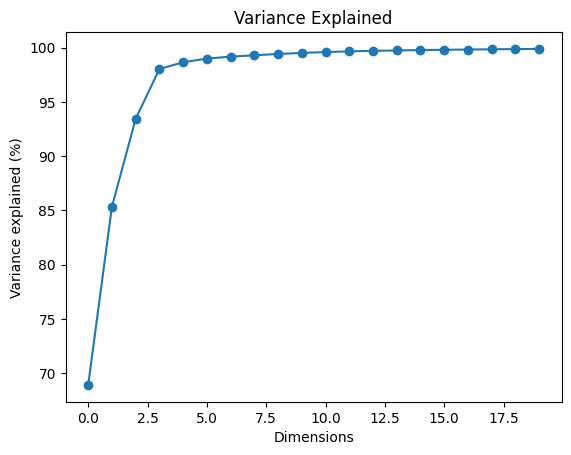

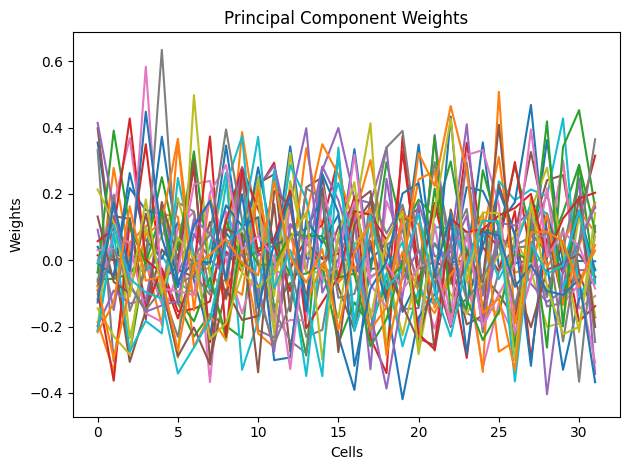

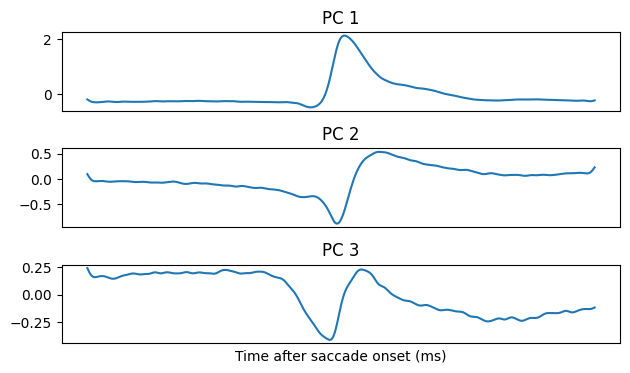

In [8]:
# PCA analysis2

PCA_total2 = {}

# Loop over the orientations (assuming 8 orientations)
# for ori in range(pca_data.shape[1]):

temp_data = pca_data  # Transpose to match the MATLAB orientation
pca = PCA()
pca.fit(temp_data)  # Perform PCA
v = pca.components_   # coeff
p = pca.transform(temp_data).T  # scores
dd = pca.explained_variance_ratio_   # explained variance

# Get the explained variance ratio and cumulative sum
var_explained = np.cumsum(dd) * 100

# Print the variance explained for the first 5 components
for i in range(5):
    print(f'Dimensions: {i+1}, Variance explained: {var_explained[i]:.2f}%')

# Find the dimension to reduce to based on cumulative variance explained
nmode = np.argmax(var_explained > 87.5) + 1  # Adding 1 since indexing is 1-based in MATLAB
print(f'Dimensions to be reduced: {nmode}')

# Store PCA results for each orientation
PCA_total2 = {'v': pca.components_, 'p': pca.transform(temp_data), 'dd': pca.explained_variance_}


# Plot variance explained
plt.figure()
plt.plot(var_explained[:20], 'o-', label="Cumulative variance explained")
plt.xlabel('Dimensions')
plt.ylabel('Variance explained (%)')
plt.title('Variance Explained')
plt.show()

# Plot the principal component weights (the eigenvectors)
plt.figure()
plt.plot(v.T)  # The components are in rows, so transpose for plotting
plt.xlabel('Cells')
plt.ylabel('Weights')
plt.title('Principal Component Weights')
plt.tight_layout()
plt.show()

# Plot the principal component time series (scores)
plt.figure()
# hx = []
for i in range(min(nmode, 4)):  # Plot the first 4 components or up to nmode
    ax = plt.subplot(4, 1, i + 1)
    # hx.append(ax)
    ax.plot(np.arange(-300, 300), p[i, :600])  # Assuming 600 time steps
    ax.set_title(f'PC {i + 1}')
    ax.axis('tight')
    ax.get_xaxis().set_ticks([])
plt.xlabel('Time after saccade onset (ms)')
plt.tight_layout()
plt.show()

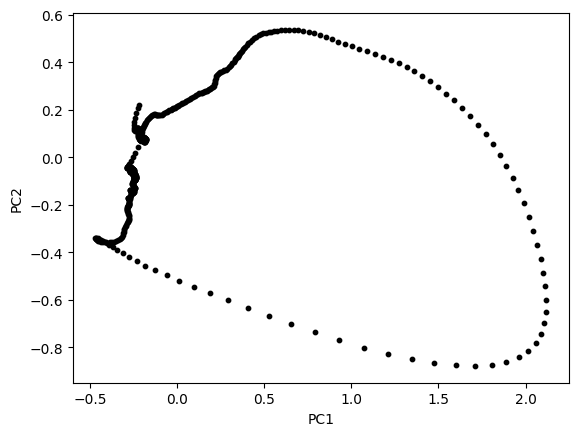

In [12]:
# Plotting

from scipy.ndimage import gaussian_filter1d

win = 1 # timewindow (ms), if sampling rate is 1000hz, win=10 is 10ms
 
plt.figure()
temp_PC = PCA_total2['p'].T

s_temp1 = gaussian_filter1d(temp_PC[0], win)
s_temp2 = gaussian_filter1d(temp_PC[1], win)
s_temp3 = gaussian_filter1d(temp_PC[2], win)

X = s_temp1[0:600]
Y = s_temp2[0:600]
Z = s_temp3[0:600]

plt.scatter(X, Y, s=10, color=[0, 0, 0], marker='o')

plt.xlabel('PC1')
plt.ylabel('PC2')
# zlabel('PC3')

plt.show()

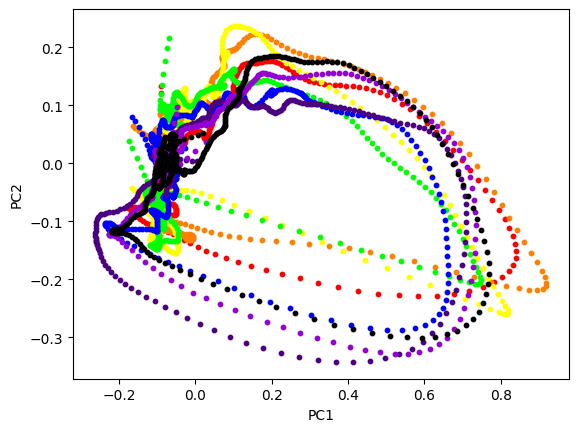

In [16]:
# Plotting

from scipy.ndimage import gaussian_filter1d

win = 1 # timewindow (ms), if sampling rate is 1000hz, win=10 is 10ms

# rainbow color
color = np.array([255, 0, 0,
                 255, 127, 0,
                 255, 255, 0,
                 0, 255, 0,
                 0, 0, 255,
                 75, 0, 130,
                 148, 0, 211,
                 0, 0, 0])

color = color / 255
    
color = np.array(color).reshape(8,3)


plt.figure()
for ori in range(8):
    
   
    temp_PC = PCA_total[ori]['p'].T
    
    s_temp1 = gaussian_filter1d(temp_PC[0], win)
    s_temp2 = gaussian_filter1d(temp_PC[1], win)
    s_temp3 = gaussian_filter1d(temp_PC[2], win)

    X = s_temp1[0:600]
    Y = s_temp2[0:600]
    Z = s_temp3[0:600]

    plt.scatter(X, Y, s=10, color=color[ori], marker='o')
    
    plt.xlabel('PC1')
    plt.ylabel('PC2')
    # zlabel('PC3')
    
plt.show()

In [ ]:
[v,p,~,~,dd,~]=pca(pca_data);

figure;
subplot(1,2,1)
plot(dd, 'o-')
xlabel('Dimensions')
ylabel('Explained varience ratio')

subplot(1,2,2)
plot(100*cumsum(dd(1:20))/sum(dd), 'o-');
xlabel('Dimensions')
ylabel('Variance explained (%)')

figure;
%     for i=1:nmode
for i=1:4;
    hx(i) = subplot(4,1,i);
    plot(-300:300-1, p(:,i))
    if i==3;
        set(gca, 'YDir','reverse')
    end
    axis tight
    box off
end

win=1;

figure

s_temp1=smoothdata(p(:,1),'gaussian',win);
s_temp2=smoothdata(p(:,2),'gaussian',win);
s_temp3=smoothdata(p(:,3),'gaussian',win);
X=s_temp1; Y=s_temp2; Z=s_temp3;
scatter3(X,Y,Z,10, "o");

axis square

xlabel('PC1')
ylabel('PC2')
zlabel('PC3')

%%
close all

pca_data=[];
for pc=1:4;
    for a=1:8;
        temp=PCA_total{a,2};
        temp=temp(:,pc);
        pca_data=[pca_data temp];
    end
end


% get betas
betas1 = pca_data(:,1:8) \ p(:,1);
betas2 = pca_data(:,9:16) \ p(:,2);
betas3 = pca_data(:,17:24) \ p(:,3);
betas4 = pca_data(:,25:32) \ p(:,4);

% plot
plot(betas1)
hold on
plot(betas2)
plot(betas3)
plot(betas4)